In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Shallow Nerual Network

In [ ]:
# loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

# preprocessing the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)


# splitting the training and test sets
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [ ]:
y_train_label_1 = (y_train == 1)
y_val_label_1 = (y_val == 1)
y_test_label_1 = (y_test == 1)

In [ ]:
y_train_label_1.ravel().shape

(50000,)

In [ ]:
# shallow NN model
def shallow_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

model = shallow_model()
model.compile(loss = "binary_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
train_shallow_model = model.fit(x_train, y_train_label_1, batch_size = 8, epochs  = 10, validation_data = (x_val, y_val_label_1))

Epoch 1/10
6250/6250 [==============================] - 24s 3ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0172 - val_accuracy: 0.9949
Epoch 2/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0171 - accuracy: 0.9952 - val_loss: 0.0118 - val_accuracy: 0.9965
Epoch 3/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0125 - accuracy: 0.9961 - val_loss: 0.0103 - val_accuracy: 0.9965
Epoch 4/10
6250/6250 [==============================] - 25s 4ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0090 - val_accuracy: 0.9968
Epoch 5/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 6/10
6250/6250 [==============================] - 22s 3ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0083 - val_accuracy: 0.9973
Epoch 7/10
6250/6250 [==============================] - 22s 4ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0068 - val_ac

In [ ]:
model.evaluate(x_test, y_test_label_1)

313/313 [==============================] - 2s 4ms/step - loss: 0.0076 - accuracy: 0.9977


[0.00763759994879365, 0.9976999759674072]

In [ ]:
y_train_label_1 = pd.Series(y_train==1)
print("Number of 1's digits in the training set are:",y_train_label_1.value_counts()[True])
print("Number of non-1's digits in the training set are:",y_train_label_1.value_counts()[False])

Number of 1's digits in the training set are: 5678
Number of non-1's digits in the training set are: 44322


In [ ]:
y_test_label_1 = pd.Series(y_test==1)
print("Number of 1's digits in the test set are:",y_test_label_1.value_counts()[True])
print("Number of non-1's digits in the test set are:",y_test_label_1.value_counts()[False])

Number of 1's digits in the test set are: 1135
Number of non-1's digits in the test set are: 8865


In [ ]:
y_val_label_1 = pd.Series(y_val==1)
print("Number of 1's digits in the validation set are:",y_val_label_1.value_counts()[True])
print("Number of non-1's digits in the validation set are:",y_val_label_1.value_counts()[False])

Number of 1's digits in the validation set are: 1064
Number of non-1's digits in the validation set are: 8936


#Neural Network with k Output Neuron

In [ ]:
# Part 1: loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocessing the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# splitting the training and test sets
x_train, x_val = x_train[:-10000], x_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# deep NN model
def deep_model():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# performing experiments with different learning rates and batch sizes
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [8, 16, 32, 64]

# storing results
sgd_results = {}
other_optimizers_results = {}

In [ ]:
# Basic minibatch SGD training
for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f'Training with SGD, learning rate {lr}, batch size {batch_size}')

        model = deep_model()
        optimizer = tf.keras.optimizers.SGD(lr)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
        test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

        sgd_results[(lr, batch_size)] = {
            'history': history,
            'test_acc': test_acc
        }

        print(f'Test accuracy with SGD, learning rate {lr}, batch size {batch_size}: {test_acc}\n')

Training with SGD, learning rate 0.01, batch size 8
Test accuracy with SGD, learning rate 0.01, batch size 8: 0.9783999919891357

Training with SGD, learning rate 0.01, batch size 16
Test accuracy with SGD, learning rate 0.01, batch size 16: 0.9746000170707703

Training with SGD, learning rate 0.01, batch size 32
Test accuracy with SGD, learning rate 0.01, batch size 32: 0.968999981880188

Training with SGD, learning rate 0.01, batch size 64
Test accuracy with SGD, learning rate 0.01, batch size 64: 0.9567999839782715

Training with SGD, learning rate 0.001, batch size 8
Test accuracy with SGD, learning rate 0.001, batch size 8: 0.9531000256538391

Training with SGD, learning rate 0.001, batch size 16
Test accuracy with SGD, learning rate 0.001, batch size 16: 0.9363999962806702

Training with SGD, learning rate 0.001, batch size 32
Test accuracy with SGD, learning rate 0.001, batch size 32: 0.9217000007629395

Training with SGD, learning rate 0.001, batch size 64
Test accuracy with SG

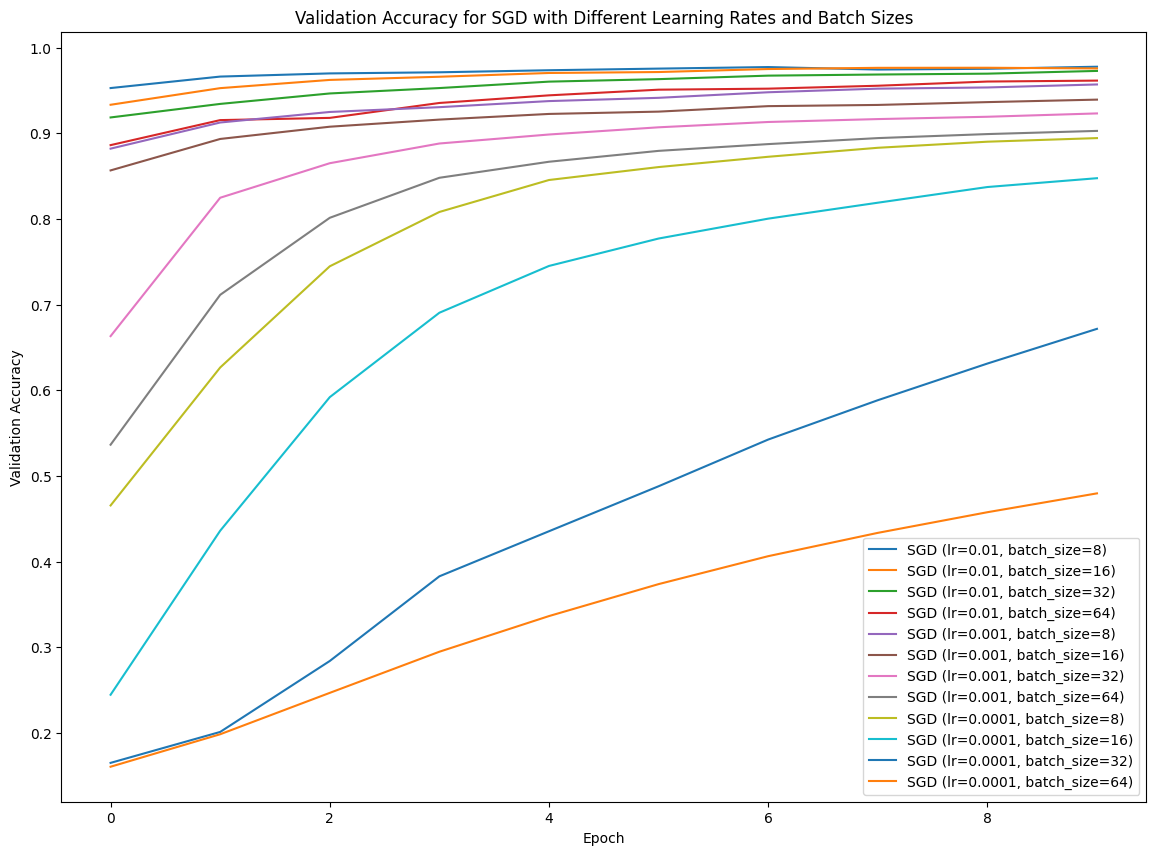

In [ ]:
# plotting validation accuracy for visualization
plt.figure(figsize=(14, 10))
for (lr, batch_size), result in sgd_results.items():
    plt.plot(result['history'].history['val_accuracy'], label=f'SGD (lr={lr}, batch_size={batch_size})')

plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Validation Accuracy for SGD with Different Learning Rates and Batch Sizes')
plt.show()

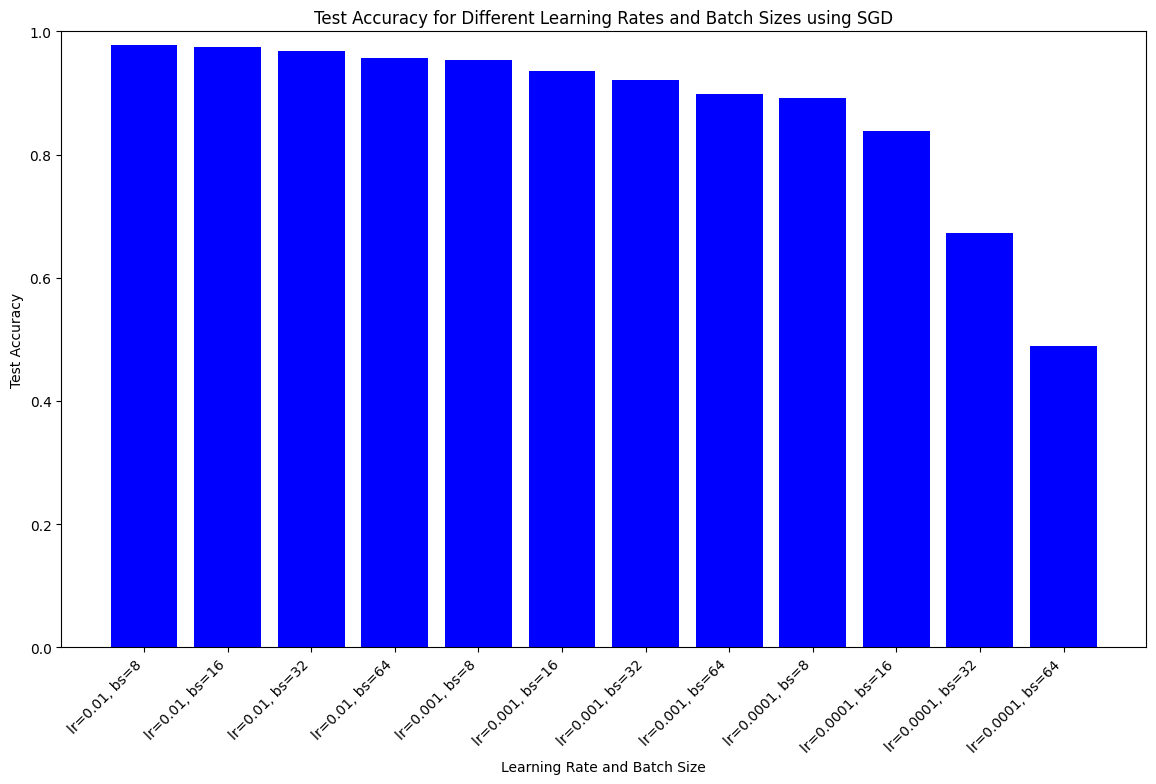

In [ ]:
# bar graph with different learning rates and batch sizes

labels = [f'lr={lr}, bs={batch_size}' for lr in learning_rates for batch_size in batch_sizes]
test_accuracies = [sgd_results[(lr, batch_size)]['test_acc'] for lr in learning_rates for batch_size in batch_sizes]

plt.figure(figsize=(14, 8))
plt.bar(labels, test_accuracies, color='blue')
plt.xlabel('Learning Rate and Batch Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Learning Rates and Batch Sizes using SGD')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()

##Other Optimization Methods

In [ ]:
# Part 2: other optimization methods like SDG Momentum, RMSprop, RMSprop Momentum, Adam, Adadelta, Adagard

optimizers = {
    'SGD Momentum': lambda lr: tf.keras.optimizers.SGD(lr, momentum=0.8),
    'RMSprop': lambda lr: tf.keras.optimizers.RMSprop(lr),
    'RMSprop Momentum': lambda lr: tf.keras.optimizers.RMSprop(lr, momentum=0.8),
    'Adam': lambda lr: tf.keras.optimizers.Adam(lr),
    'Adadelta': lambda lr: tf.keras.optimizers.Adadelta(lr),
    'Adagrad': lambda lr: tf.keras.optimizers.Adagrad(lr)
}

# Loop over each learning rate and batch size combination
for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f'Learning rate: {lr}, Batch size: {batch_size}')

        # Loop over each optimizer
        for opt_name, opt_func in optimizers.items():
            print(f'Training with {opt_name}, learning rate {lr}')

            model = deep_model()
            optimizer = opt_func(lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

            # Store results
            other_optimizers_results[(opt_name, lr, batch_size)] = {
                'history': history,
                'test_acc': test_acc
            }

            print(f'Test accuracy with {opt_name}, learning rate {lr}, batch size {batch_size}: {test_acc}\n')

Learning rate: 0.01, Batch size: 8
Training with SGD Momentum, learning rate 0.01
Test accuracy with SGD Momentum, learning rate 0.01, batch size 8: 0.9778000116348267

Training with RMSprop, learning rate 0.01
Test accuracy with RMSprop, learning rate 0.01, batch size 8: 0.1160999983549118

Training with RMSprop Momentum, learning rate 0.01
Test accuracy with RMSprop Momentum, learning rate 0.01, batch size 8: 0.392300009727478

Training with Adam, learning rate 0.01
Test accuracy with Adam, learning rate 0.01, batch size 8: 0.9401999711990356

Training with Adadelta, learning rate 0.01
Test accuracy with Adadelta, learning rate 0.01, batch size 8: 0.9383000135421753

Training with Adagrad, learning rate 0.01
Test accuracy with Adagrad, learning rate 0.01, batch size 8: 0.9789999723434448

Learning rate: 0.01, Batch size: 16
Training with SGD Momentum, learning rate 0.01
Test accuracy with SGD Momentum, learning rate 0.01, batch size 16: 0.9796000123023987

Training with RMSprop, lear

In [ ]:
# Loop over each learning rate and batch size combination for 0.0001
for lr in [0.0001]:
    for batch_size in batch_sizes:
        print(f'Learning rate: {lr}, Batch size: {batch_size}')

        # Loop over each optimizer
        for opt_name, opt_func in optimizers.items():
            print(f'Training with {opt_name}, learning rate {lr}')

            model = deep_model()
            optimizer = opt_func(lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

            history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

            # Store results
            other_optimizers_results[(opt_name, lr, batch_size)] = {
                'history': history,
                'test_acc': test_acc
            }

            print(f'Test accuracy with {opt_name}, learning rate {lr}, batch size {batch_size}: {test_acc}\n')

Learning rate: 0.0001, Batch size: 8
Training with SGD Momentum, learning rate 0.0001
Test accuracy with SGD Momentum, learning rate 0.0001, batch size 8: 0.9362000226974487

Training with RMSprop, learning rate 0.0001
Test accuracy with RMSprop, learning rate 0.0001, batch size 8: 0.9765999913215637

Training with RMSprop Momentum, learning rate 0.0001
Test accuracy with RMSprop Momentum, learning rate 0.0001, batch size 8: 0.9797999858856201

Training with Adam, learning rate 0.0001
Test accuracy with Adam, learning rate 0.0001, batch size 8: 0.9778000116348267

Training with Adadelta, learning rate 0.0001
Test accuracy with Adadelta, learning rate 0.0001, batch size 8: 0.41370001435279846

Training with Adagrad, learning rate 0.0001
Test accuracy with Adagrad, learning rate 0.0001, batch size 8: 0.8515999913215637

Learning rate: 0.0001, Batch size: 16
Training with SGD Momentum, learning rate 0.0001
Test accuracy with SGD Momentum, learning rate 0.0001, batch size 16: 0.91740000247

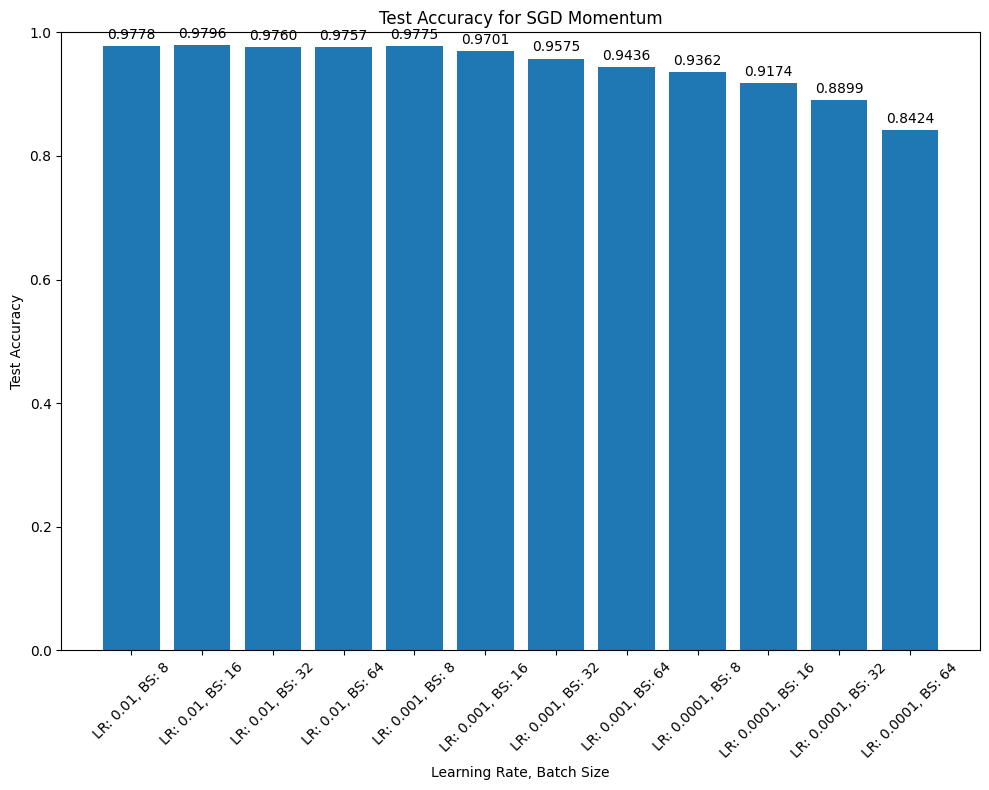

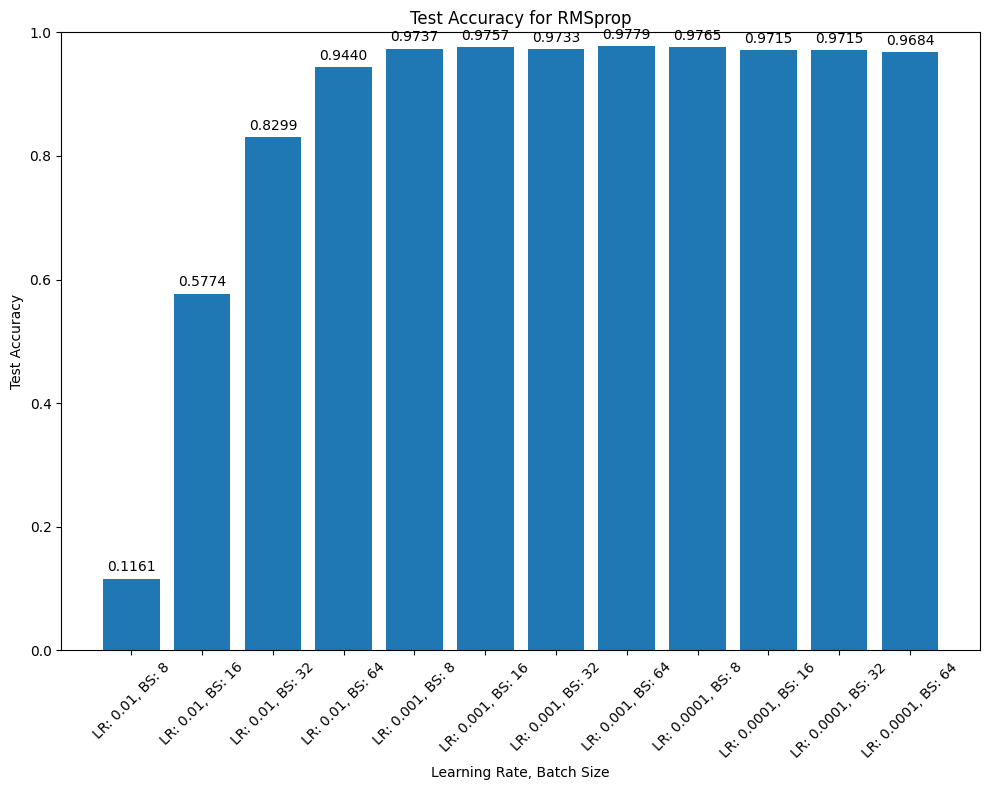

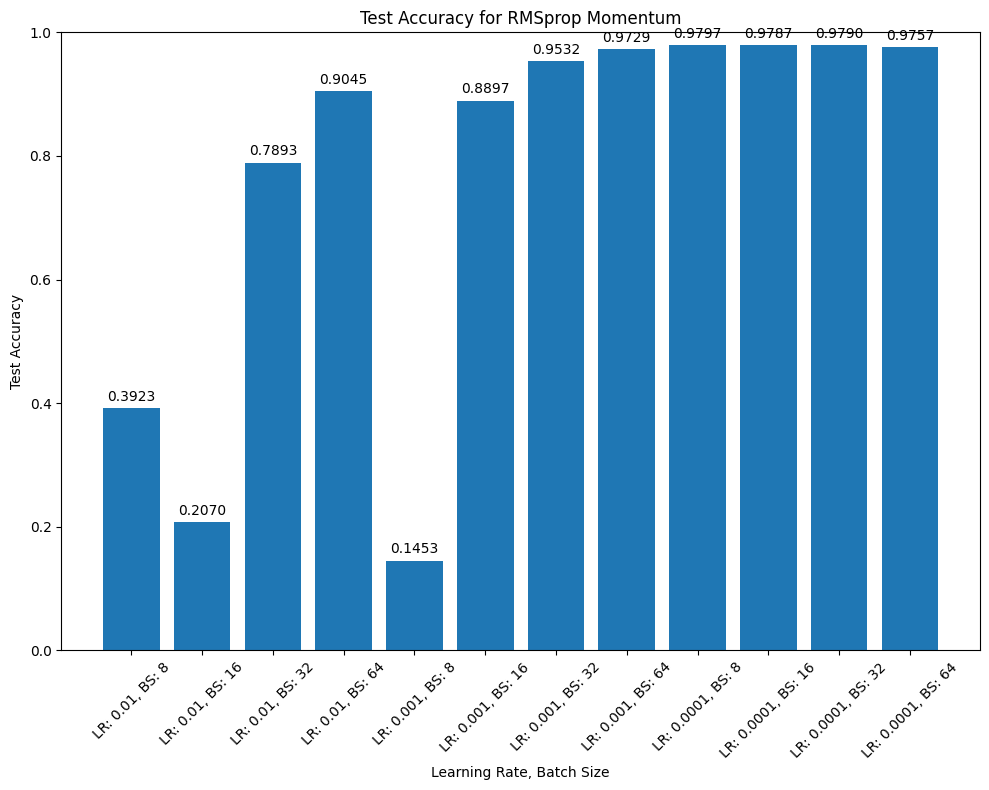

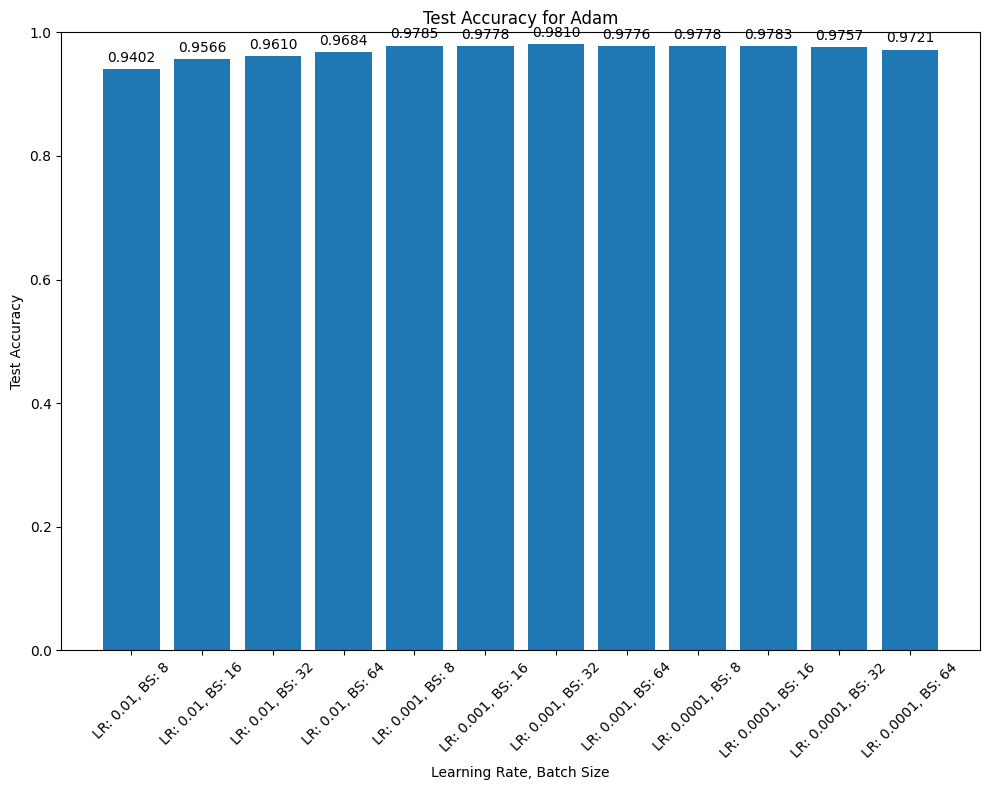

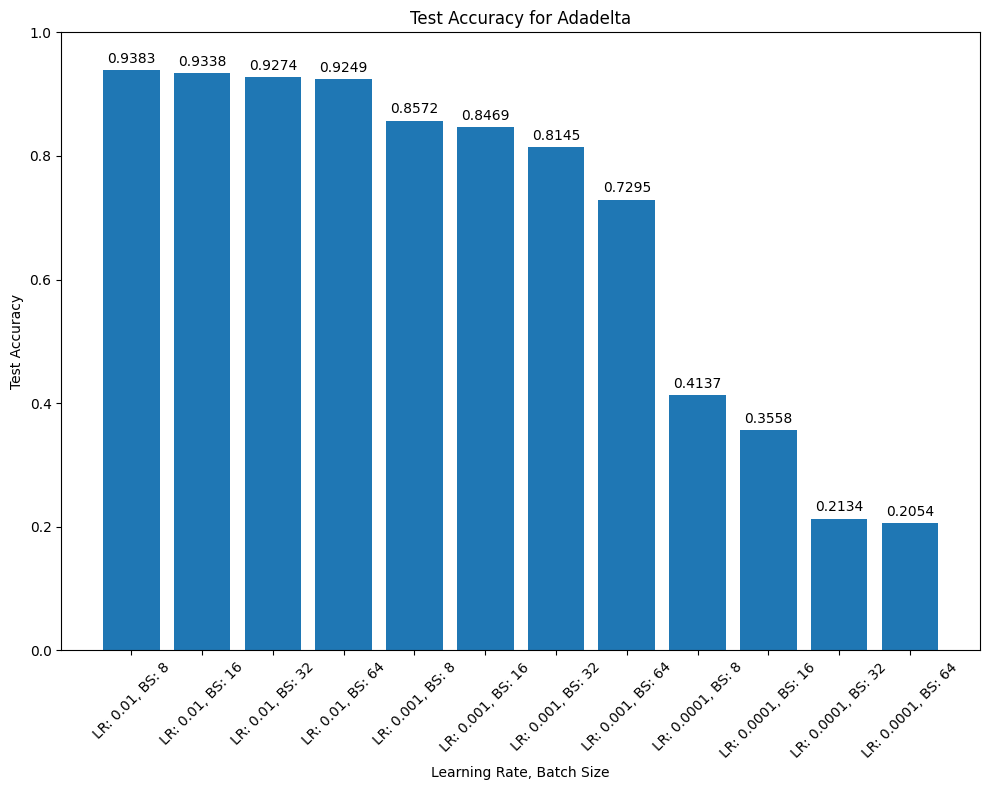

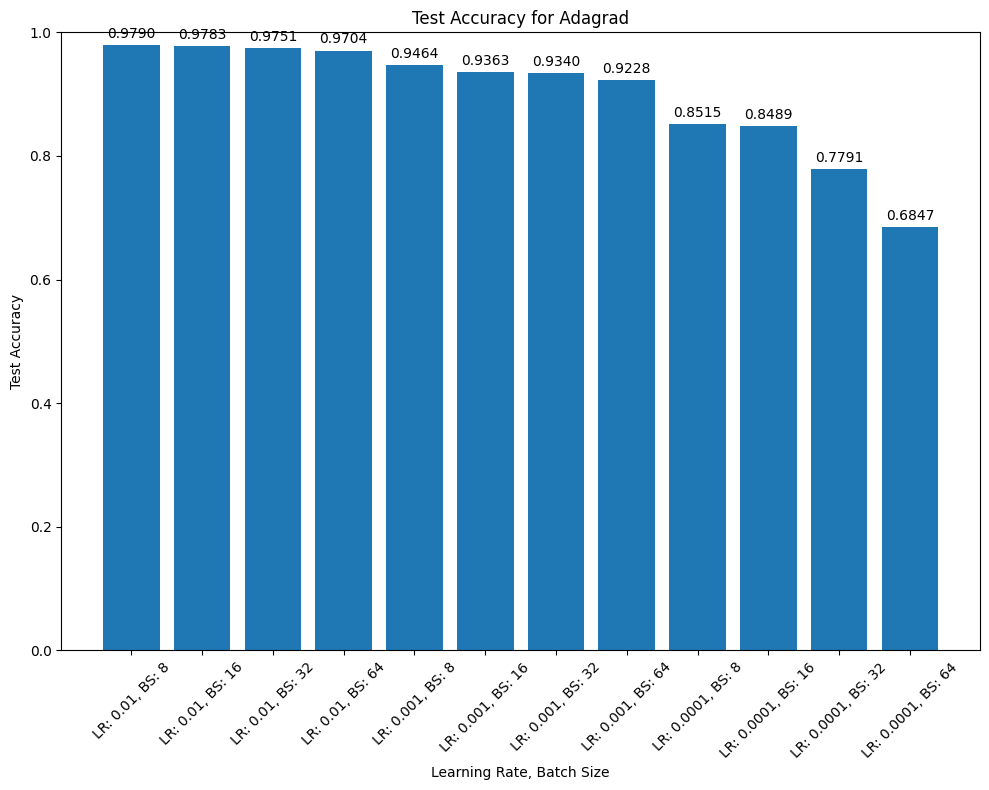

In [ ]:
# grouping results by optimizer
grouped_results = {}
for key, value in other_optimizers_results.items():
    optimizer, lr, bs = key
    if optimizer not in grouped_results:
        grouped_results[optimizer] = []
    grouped_results[optimizer].append((lr, bs, value['test_acc']))

# plotting bar charts for each optimizer
for optimizer, results in grouped_results.items():

    # extracting the data for plotting
    learning_rates = [result[0] for result in results]
    batch_sizes = [result[1] for result in results]
    accuracies = [result[2] for result in results]

    # creating a bar chart
    plt.figure(figsize=(10, 8))
    bars = plt.bar(range(len(accuracies)), accuracies, tick_label=[f'LR: {lr}, BS: {bs}' for lr, bs in zip(learning_rates, batch_sizes)])
    plt.xlabel('Learning Rate, Batch Size')
    plt.ylabel('Test Accuracy')
    plt.title(f'Test Accuracy for {optimizer}')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)

    # annotate bars with accuracy values
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
